In [1]:
# !pip install mysql-connector-python pandas

In [1]:
import mysql.connector
import pandas as pd

# MySQL connection
conn = mysql.connector.connect(
    host='localhost',        # or your MySQL host
    user='root',
    password='12345',
    database='project1'
)

# Query the table
query = "SELECT * FROM predictive_maintenance;"

# Load data into pandas DataFrame
df = pd.read_sql(query, conn)

df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_17232\2526816399.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,ï»¿UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [2]:
df.shape

(10000, 10)

# EDA 

In [3]:
df.drop(columns=['ï»¿UDI','Product ID','Failure Type'], inplace=True)

In [4]:
print("Data Types:", df.dtypes)
df.describe()

Data Types: Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
dtype: object


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [5]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
dtype: int64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

target_col = 'Target'  # change if your target column name is different


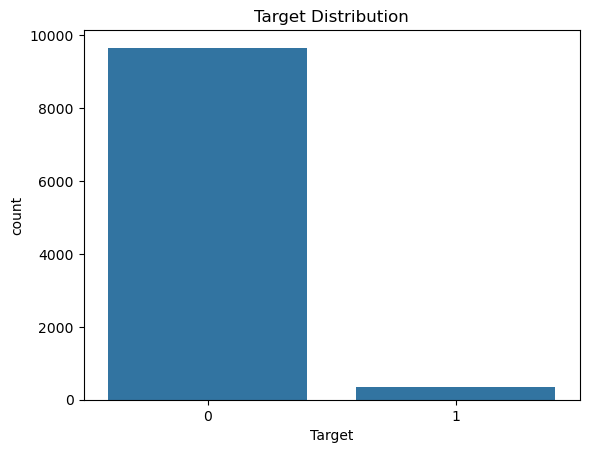

In [7]:
sns.countplot(x=target_col, data=df)
plt.title('Target Distribution')
plt.show()

<Axes: xlabel='count', ylabel='Type'>

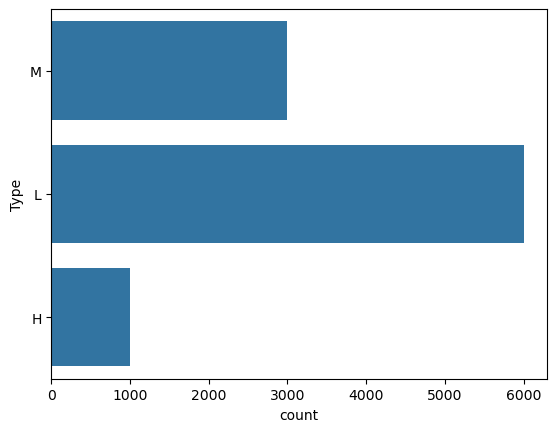

In [8]:
sns.countplot(df['Type'])

In [9]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [10]:
#  Numerical Features Distribution
# -------------------------------
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target']

In [11]:
df[numerical_cols]

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0
9996,298.9,308.4,1632,31.8,17,0
9997,299.0,308.6,1645,33.4,22,0
9998,299.0,308.7,1408,48.5,25,0


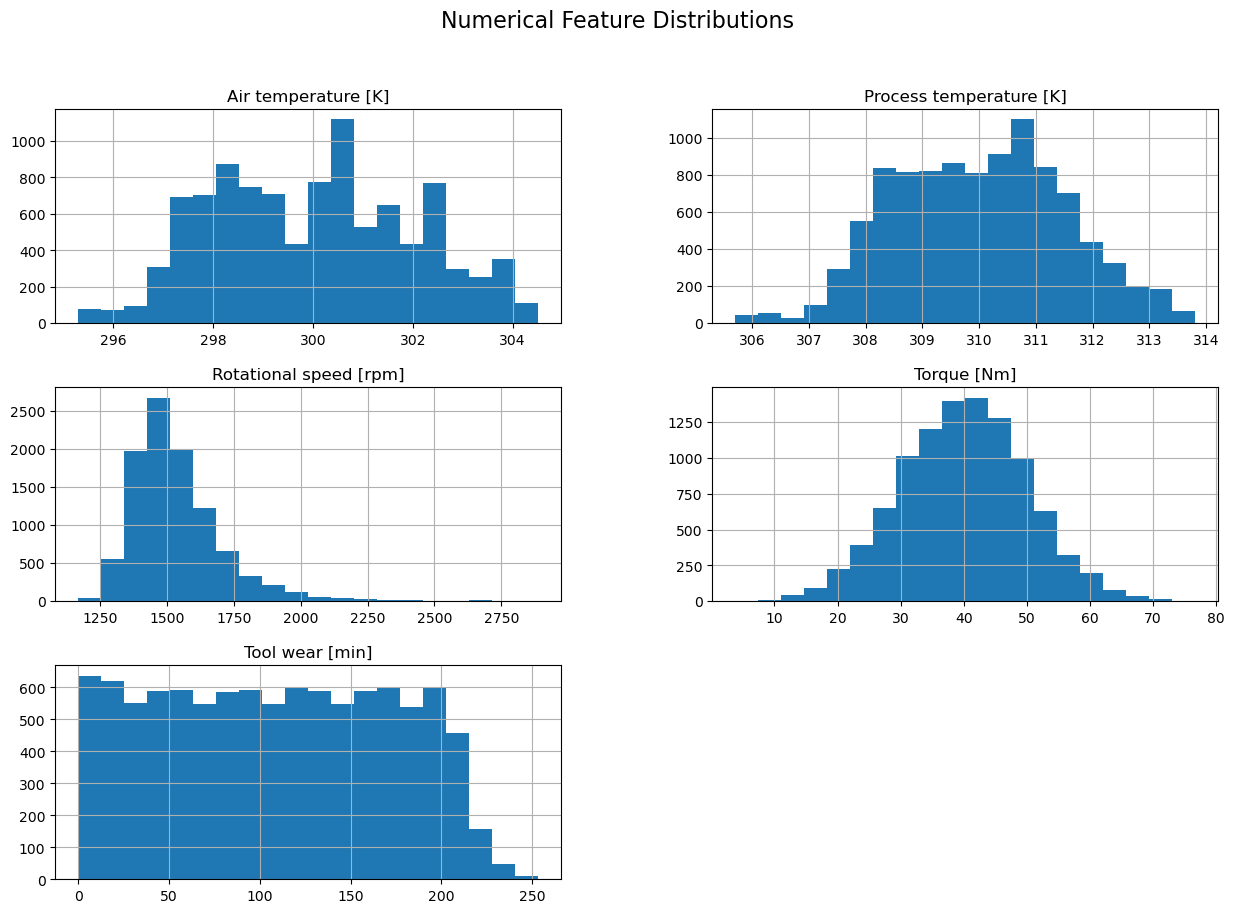

In [12]:
numerical_cols.remove(target_col)  # exclude target
df[numerical_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle('Numerical Feature Distributions', fontsize=16)
plt.show()

In [13]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'],
      dtype='object')

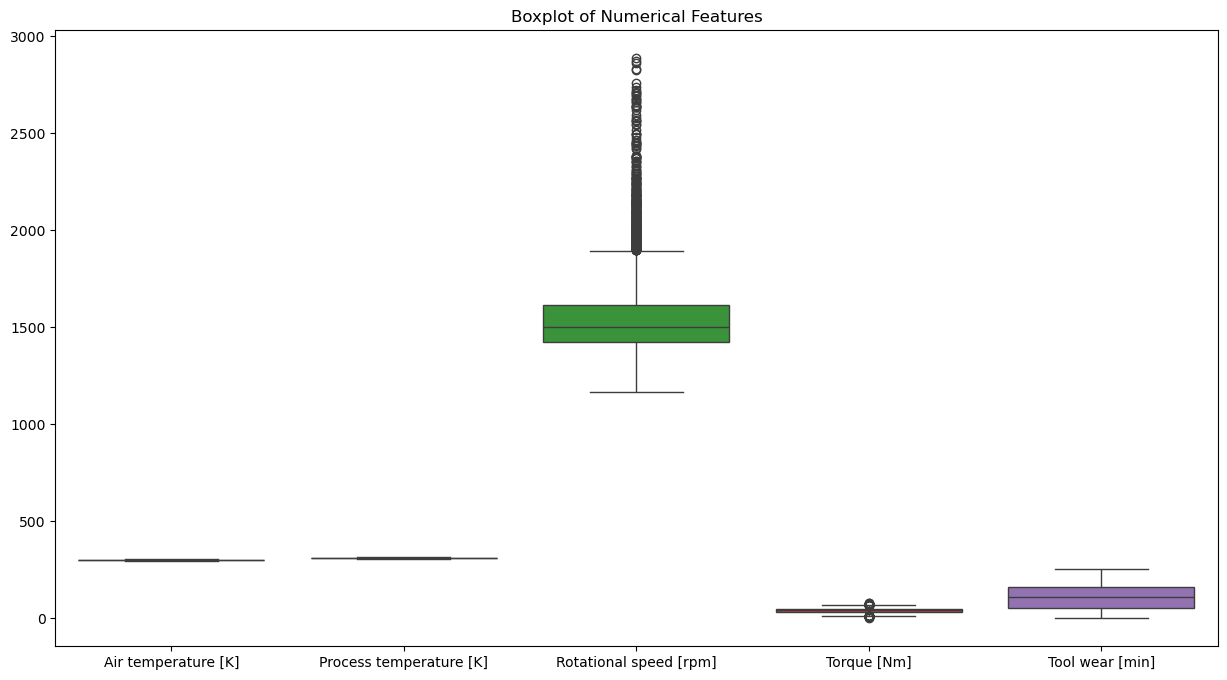

In [14]:
# Boxplots to check outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot of Numerical Features')
plt.show()

<Axes: xlabel='Rotational speed [rpm]'>

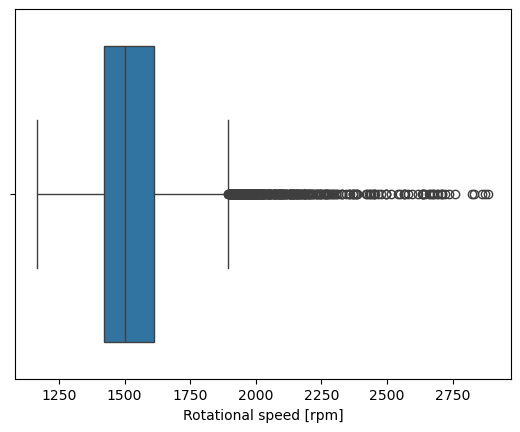

In [17]:
sns.boxplot(x = df['Rotational speed [rpm]'])

In [18]:
for col in [ 'Rotational speed [rpm]', 'Torque [Nm]']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

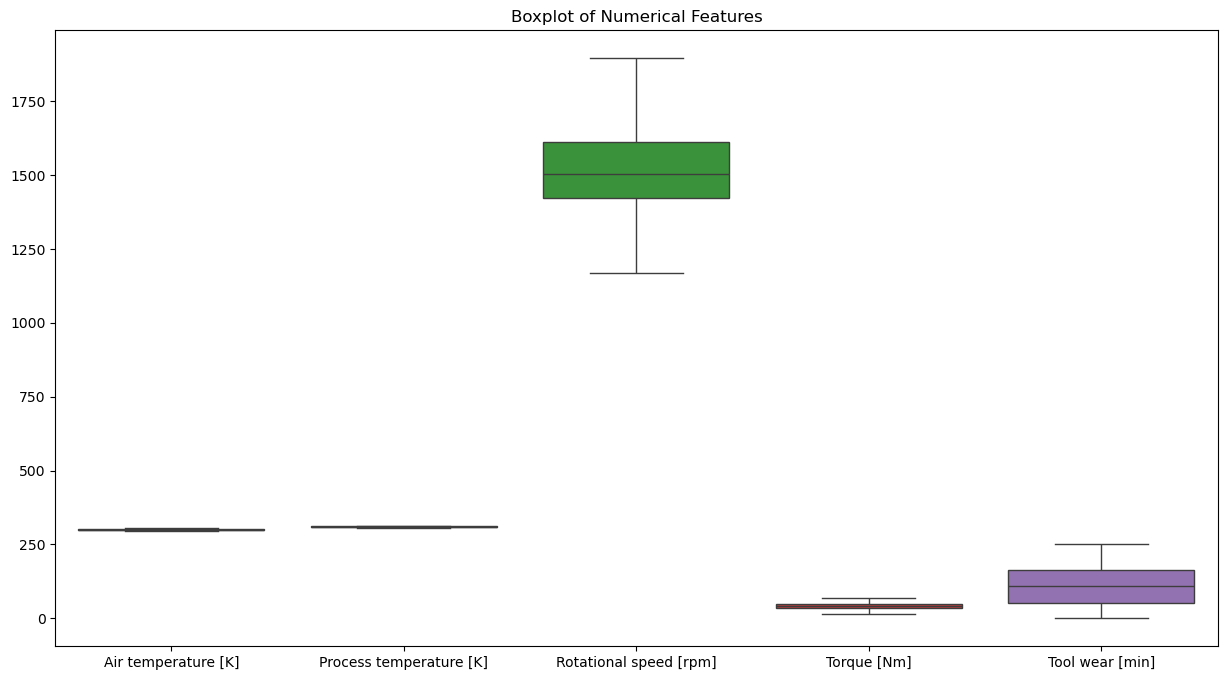

In [19]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot of Numerical Features')
plt.show()

# Data Transformation

In [20]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551.0,42.8,0,0
1,L,298.2,308.7,1408.0,46.3,3,0
2,L,298.1,308.5,1498.0,49.4,5,0
3,L,298.2,308.6,1433.0,39.5,7,0
4,L,298.2,308.7,1408.0,40.0,9,0


In [21]:
df = pd.get_dummies(data=df, columns=['Type'], dtype = int)
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_H,Type_L,Type_M
0,298.1,308.6,1551.0,42.8,0,0,0,0,1
1,298.2,308.7,1408.0,46.3,3,0,0,1,0
2,298.1,308.5,1498.0,49.4,5,0,0,1,0
3,298.2,308.6,1433.0,39.5,7,0,0,1,0
4,298.2,308.7,1408.0,40.0,9,0,0,1,0
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604.0,29.5,14,0,0,0,1
9996,298.9,308.4,1632.0,31.8,17,0,1,0,0
9997,299.0,308.6,1645.0,33.4,22,0,0,0,1
9998,299.0,308.7,1408.0,48.5,25,0,1,0,0


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
x = df.drop(columns=['Target'])
y = df['Target']

In [24]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [25]:
x

array([[-0.95238944, -0.94735989,  0.14017979, ..., -0.33388861,
        -1.22474487,  1.52861702],
       [-0.90239341, -0.879959  , -0.82089946, ..., -0.33388861,
         0.81649658, -0.65418609],
       [-0.95238944, -1.01476077, -0.2160244 , ..., -0.33388861,
         0.81649658, -0.65418609],
       ...,
       [-0.50242514, -0.94735989,  0.77193818, ..., -0.33388861,
        -1.22474487,  1.52861702],
       [-0.50242514, -0.879959  , -0.82089946, ...,  2.99501081,
        -1.22474487, -0.65418609],
       [-0.50242514, -0.879959  , -0.20258274, ..., -0.33388861,
        -1.22474487,  1.52861702]])

In [26]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Target, Length: 10000, dtype: int64

# Model building

In [27]:
# !pip install xgboost

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import ADASYN

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [29]:
df['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [31]:
# Handle imbalance using ADASYN
adasyn = ADASYN(random_state=42)
xres, yres = adasyn.fit_resample(x, y)
xres.shape

(19283, 8)

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(xres, yres, test_size=0.2, random_state=42)

In [38]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC()
}
# models.items() #Returns the pair of key:value in tuple format from dictionary.

In [37]:
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(xtrain, ytrain)
    
    train_acc = accuracy_score(ytrain, model.predict(xtrain))
    test_acc = accuracy_score(ytest, model.predict(xtest))
    
    print(f"{name} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")


Training Logistic Regression...
Logistic Regression - Train Accuracy: 0.7325, Test Accuracy: 0.7418

Training Random Forest...
Random Forest - Train Accuracy: 1.0000, Test Accuracy: 0.9793

Training XGBoost...
XGBoost - Train Accuracy: 0.9990, Test Accuracy: 0.9826

Training Decision Tree...
Decision Tree - Train Accuracy: 1.0000, Test Accuracy: 0.9691

Training SVM...
SVM - Train Accuracy: 0.9354, Test Accuracy: 0.9386


In [ ]:
df.head()